In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
from prophet import Prophet
from prophet.plot import plot_plotly
%matplotlib inline


In [54]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET (1).csv')


In [55]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [57]:
df['FullDate'] = pd.to_datetime(df['FullDate'], format='%Y-%m-%d')

In [58]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [59]:
df.duplicated().sum()

0

In [60]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [61]:
df_copy = df.copy()

In [62]:
df_copy.set_index(df_copy['FullDate'], inplace=True)

In [63]:
avg_yr = df_copy[['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice']].resample('M').mean()

In [70]:
from statsmodels.tsa.stattools import adfuller
#function to check stationarity using Augmented Dickey fuller test for all 6 exchange

ADF = adfuller(df['ElecPrice'], autolag='AIC')
print(f'ADF statistics for Electric Price is: {ADF[0]}')
print(f'p-Value: {ADF[1]}')
for key, value in ADF[4].items():
    print('critical values: ')
    print(f'    {key},  {value}')

ADF statistics for Electric Price is: -31.952975699557918
p-Value: 0.0
critical values: 
    1%,  -3.430421110703783
critical values: 
    5%,  -2.8615714297867108
critical values: 
    10%,  -2.56678672898094


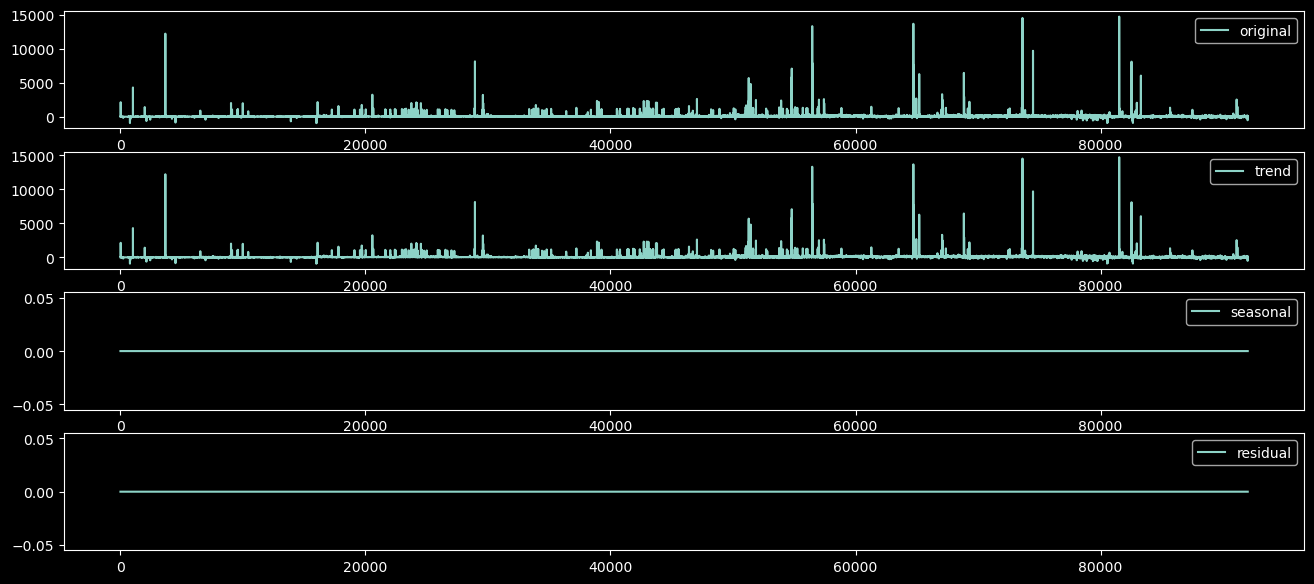

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(df['ElecPrice'], period=1, model='additive')
trend = dec.trend
season = dec.seasonal
residual = dec.resid

plt.figure(figsize=(16,7))
plt.subplot(411)
plt.plot(df['ElecPrice'], label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(season, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')

In [66]:
df_copy

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,,
2010-09-01 00:00:00,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
2021-02-28 19:00:00,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


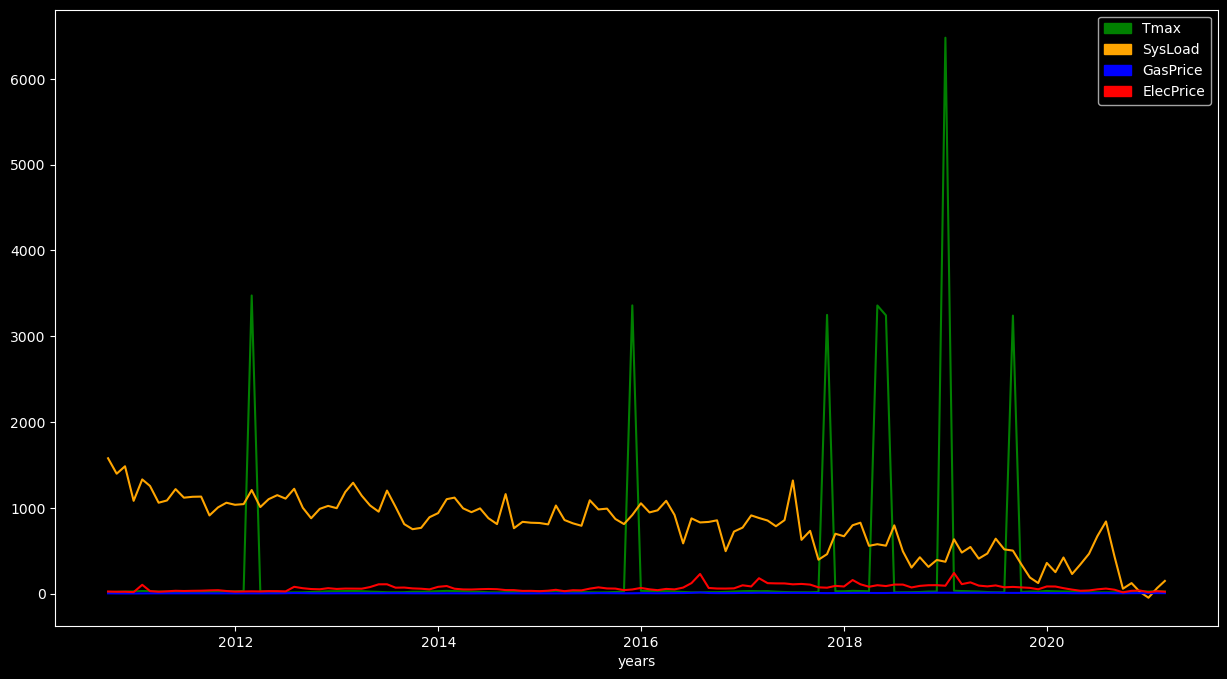

In [111]:
plt.figure(figsize=(15,8))
plt.xlabel('years')
plt.plot(avg_yr.index, avg_yr['Tmax'], color='g')
plt.plot(avg_yr.index, avg_yr['SysLoad'], color='orange')
plt.plot(avg_yr.index, avg_yr['GasPrice'], color='b')
plt.plot(avg_yr.index, avg_yr['ElecPrice'], color='r')

TM = mpatches.Patch(color='g', label='Tmax')
SL = mpatches.Patch(color='orange', label='SysLoad')
GS = mpatches.Patch(color='b', label='GasPrice')
EP = mpatches.Patch(color='r', label='ElecPrice')
plt.legend(handles=[TM, SL, GS, EP]);

In [14]:
avg_yr_EP = df_copy[['ElecPrice']].resample('D').mean()

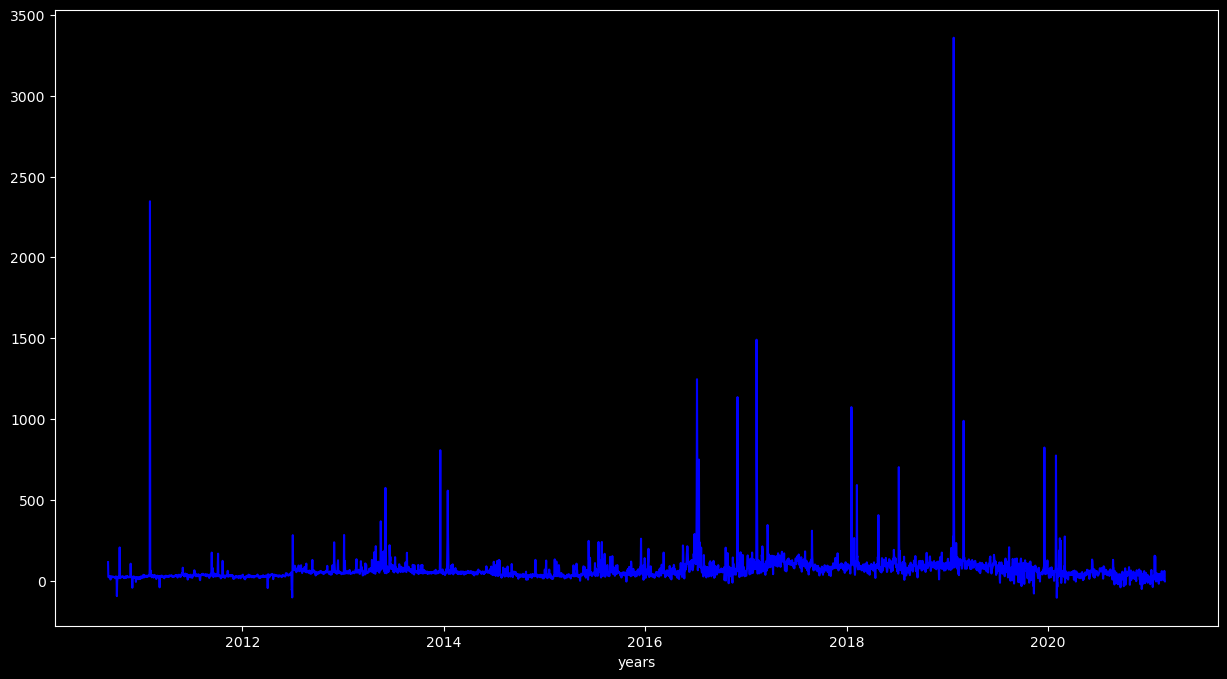

In [110]:
plt.figure(figsize=(15,8))
plt.xlabel('years')

plt.plot(avg_yr_EP.index, avg_yr_EP['ElecPrice'], color='b')

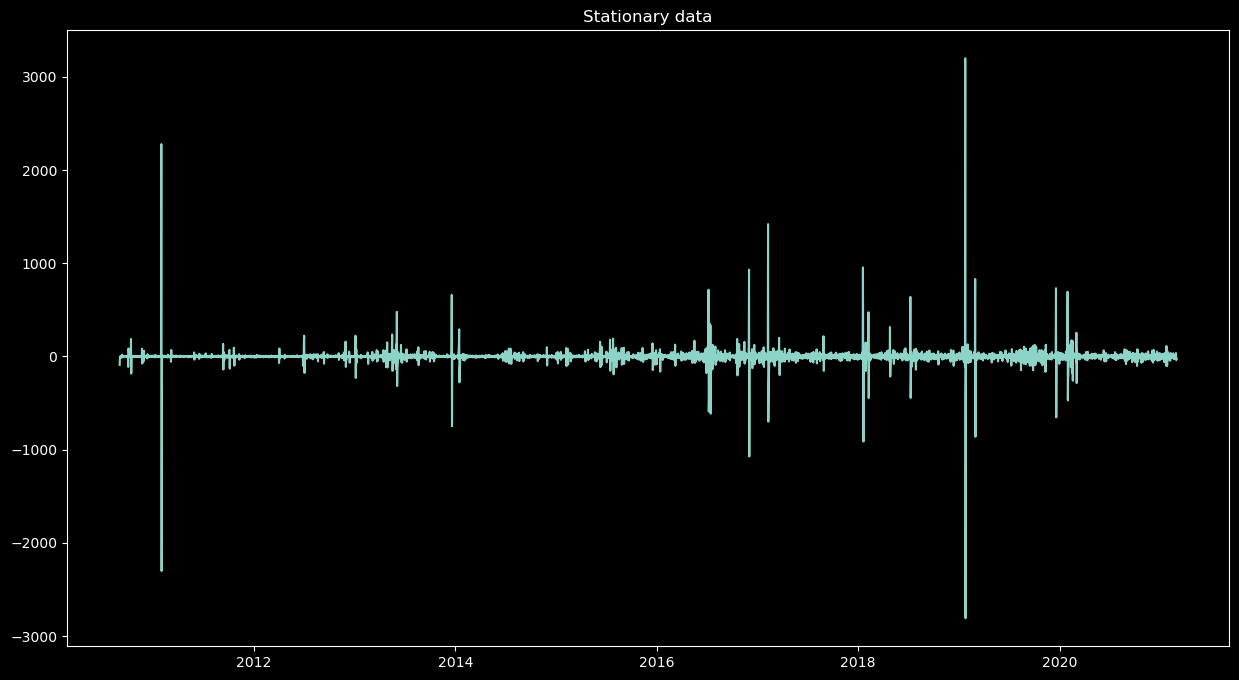

In [109]:
#differencing
dif = avg_yr_EP['ElecPrice'] - avg_yr_EP['ElecPrice'].shift(1)
plt.figure(figsize=(15,8))
plt.title('Stationary data')
plt.plot(dif)

In [72]:
ADF = adfuller(df['ElecPrice'], autolag='AIC')
print(f'ADF statistics for Electric Price is: {ADF[0]}')
print(f'p-Value: {ADF[1]}')
for key, value in ADF[4].items():
    print('critical values: ')
    print(f'    {key},  {value}')

ADF statistics for Electric Price is: -31.952975699557918
p-Value: 0.0
critical values: 
    1%,  -3.430421110703783
critical values: 
    5%,  -2.8615714297867108
critical values: 
    10%,  -2.56678672898094


In [74]:
train = avg_yr_EP[avg_yr_EP.index < pd.to_datetime("2017-07-20", format='%Y-%m-%d')]
test = avg_yr_EP[avg_yr_EP.index > pd.to_datetime("2017-07-20", format='%Y-%m-%d')]

#The first 2757 days from 2010 to 2021 ends on 2017-07-20

In [78]:
train = train.reset_index()
test = test.reset_index()

In [79]:
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [80]:
train.head()

,ds,y
0,2010-09-01,114.654167
1,2010-09-02,23.783750
2,2010-09-03,21.040625
3,2010-09-04,20.928125
4,2010-09-05,20.856458


In [98]:
m = Prophet(interval_width=0.95)
model = m.fit(train)

17:23:25 - cmdstanpy - INFO - Chain [1] start processing
17:23:26 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
forecast = m.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-21,121.702488,7.148352,288.237143,121.702488,121.702488,25.870989,25.870989,25.870989,0.481978,0.481978,0.481978,25.389011,25.389011,25.389011,0.0,0.0,0.0,147.573477
1,2017-07-22,121.800826,-14.697050,292.532085,121.800826,121.800826,11.633121,11.633121,11.633121,-10.622327,-10.622327,-10.622327,22.255449,22.255449,22.255449,0.0,0.0,0.0,133.433947
2,2017-07-23,121.899164,-23.259950,284.256239,121.899164,121.899164,5.273926,5.273926,5.273926,-13.825860,-13.825860,-13.825860,19.099786,19.099786,19.099786,0.0,0.0,0.0,127.173090
3,2017-07-24,121.997502,-5.623707,303.236616,121.997502,121.997502,22.611836,22.611836,22.611836,6.638208,6.638208,6.638208,15.973629,15.973629,15.973629,0.0,0.0,0.0,144.609339
4,2017-07-25,122.095840,-11.288251,295.142070,122.095840,122.095840,13.966538,13.966538,13.966538,1.040489,1.040489,1.040489,12.926050,12.926050,12.926050,0.0,0.0,0.0,136.062379


In [86]:
forcast[['ds', 'yhat']]  

,ds,yhat
0,2017-07-21,147.573477
1,2017-07-22,133.433947
2,2017-07-23,127.173090
3,2017-07-24,144.609339
4,2017-07-25,136.062379
...,...,...
1314,2021-02-24,249.283816
1315,2021-02-25,250.229344
1316,2021-02-26,240.102052
1317,2021-02-27,227.962893


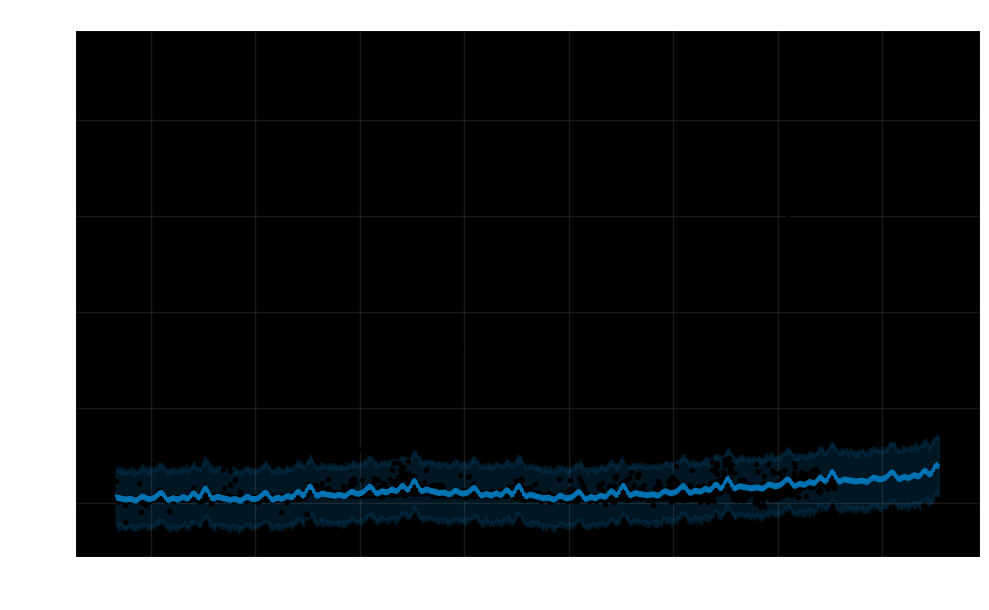

In [106]:
# Plot the actual and predicted values
fig = model.plot(forecast)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


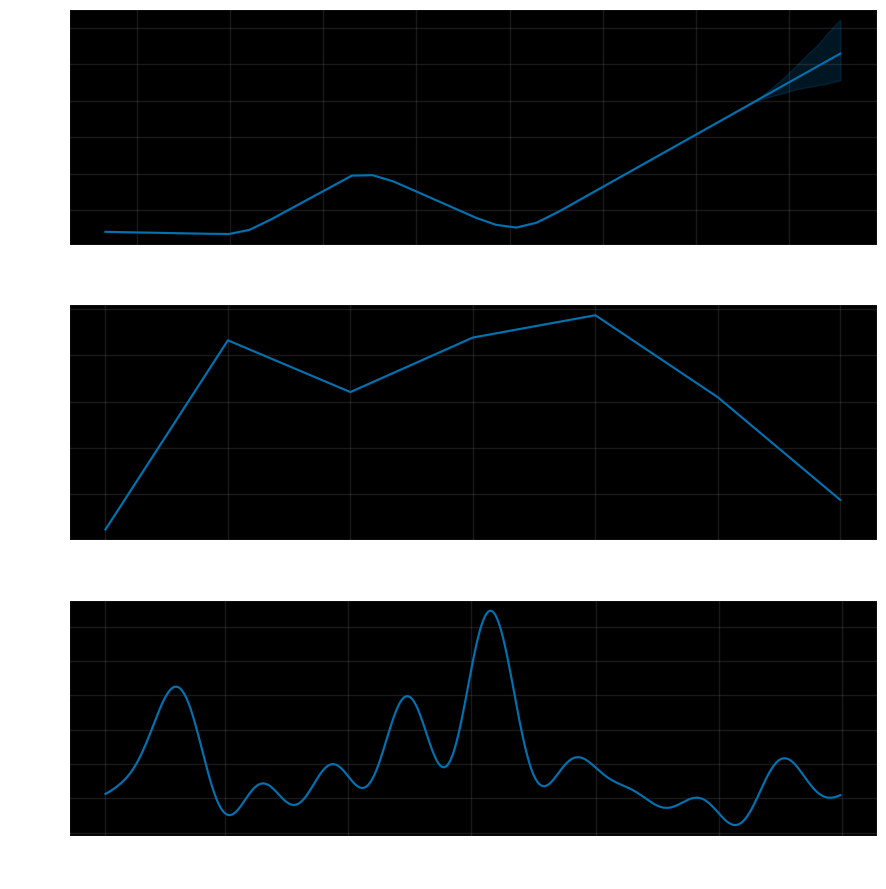

In [103]:
# Plot the forecast components
fig = model.plot_components(forecast)
plt.show()


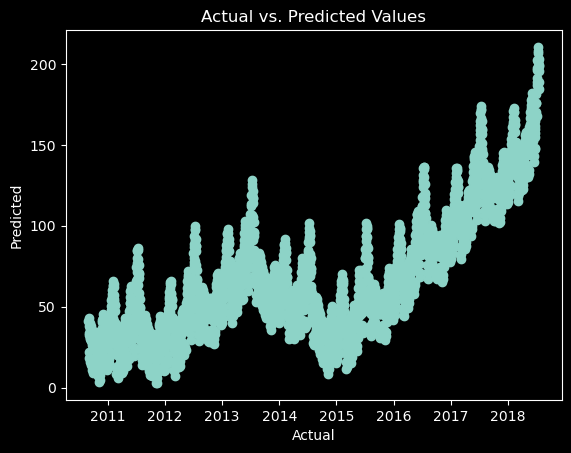

In [104]:
# Create a scatterplot of actual vs. predicted values
plt.scatter(forecast['ds'], forecast['yhat'])
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


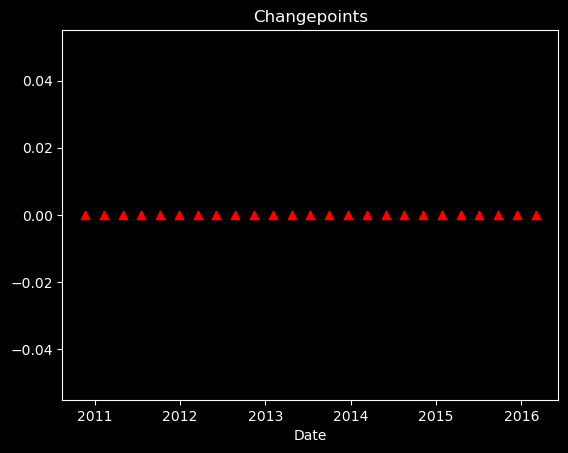

In [105]:
# Get the changepoints
changepoints = m.changepoints

# Plot the changepoints
plt.scatter(changepoints, [0]*len(changepoints), marker='^', color='r')
plt.title('Changepoints')
plt.xlabel('Date')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
#mean absolute errorS
mae = mean_absolute_error(y_true, y_pred)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)


In [ ]:
#root mean squared error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
#r-squared
r2 = r2_score(y_true, y_pred)